In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pygimli as pg
from pygimli.physics import ert

In [18]:
times = np.arange(36) * timedelta(seconds=20) + datetime(year=2008, day=1, month=1)
self = ert.CrossholeERT("data/*.dat", times=times)
print(self)
self.saveData("alert")

24/10/23 - 17:09:02 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Guenther.T\Anwendungsdaten\pygimli\Cache\11945265488991991389


Crosshole (9 boreholes) Timelapse ERT data:
Data: Sensors: 144 data: 1256, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']
36 time steps from 2008-01-01 00:00 to 2008-01-01 00:11


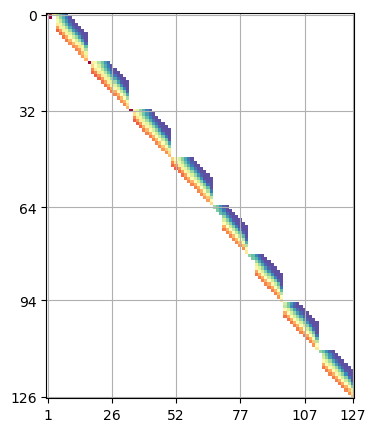

<Figure size 640x480 with 0 Axes>

In [3]:
self.generateDataPDF(cMin=2, cMax=200)

24/10/23 - 16:46:48 - pyGIMLi - INFO - Found 2 regions.
24/10/23 - 16:46:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


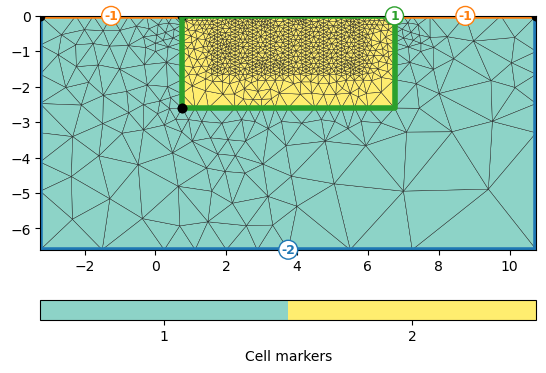

In [6]:
self.createMesh(ref=0.1, ibound=1, obound=5, quality=34, show=True)

24/10/23 - 16:46:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/10/23 - 16:46:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/10/23 - 16:46:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3648 Cells: 7132 Boundaries: 5430
24/10/23 - 16:46:50 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002752D1A9310>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002752D1A9400>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002752D1A93B0>
min/max (data): 0.49/606
min/max (error): 3%/3.2%
min/max (start model): 100/100
--------------------------------------------------------------------------------
chi² = 300.04
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 5.29 (dPhi = 97.69%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2.69 (dPhi = 41.16%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2.0 (dPhi = 9.5%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.93 (dPhi = 2.31%) lam: 20.0
---------------------------------------------------

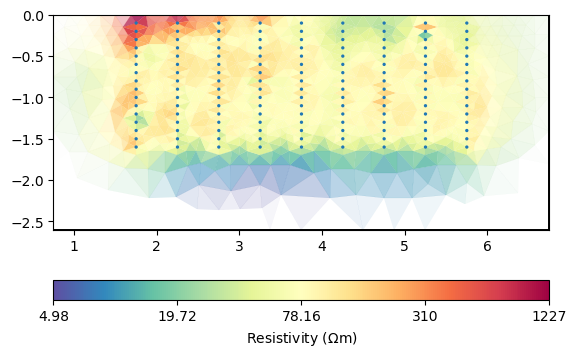

In [7]:
self.invert(t=0, verbose=True)

In [8]:
self.fullInversion(reg={"correlationLengths": [1, 0.5]})

24/10/23 - 16:47:10 - pyGIMLi - INFO - Found 2 regions.
24/10/23 - 16:47:10 - pyGIMLi - INFO - Region with smallest marker (1) set to background
24/10/23 - 16:47:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/10/23 - 16:47:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/10/23 - 16:47:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3648 Cells: 7132 Boundaries: 5430
24/10/23 - 16:47:12 - pyGIMLi - INFO - Starting inversion.


1480 model cells
Mesh: Nodes: 3648 Cells: 7132 Boundaries: 5430
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x0000027546907770>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000002754695B040>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027546907810>
min/max (data): 0.12/606
min/max (error): 3%/1.0e+10%
min/max (start model): 6.31/6.31
--------------------------------------------------------------------------------
chi² = 858.34
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 415.88 (dPhi = 51.48%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 115.51 (dPhi = 72.01%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 4.99 (dPhi = 93.95%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.99 (

53280 [41.2775374717688,...,17.61466445851372]

In [9]:
self.generateModelPDF(cMin=5, cMax=500)

<Figure size 800x500 with 0 Axes>

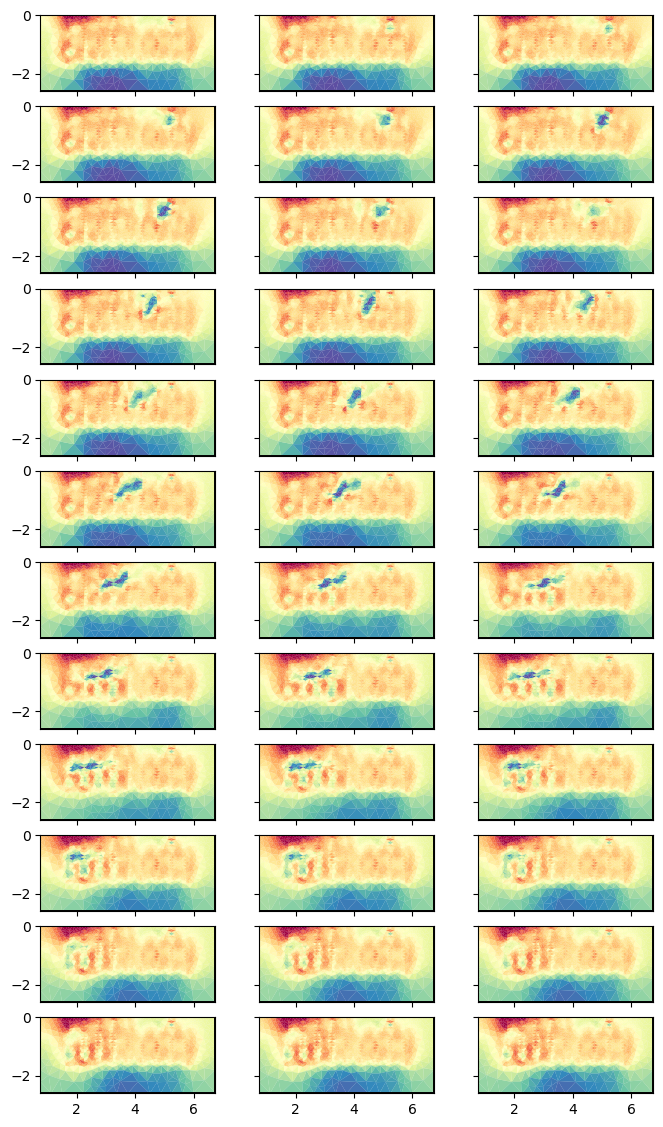

In [16]:
_, ax = plt.subplots(nrows=12, ncols=3, sharex=True, sharey=True, figsize=(8, 14))
for i, model in enumerate(self.models):
    pg.show(self.pd, model, cMin=5, cMax=500, cMap="Spectral_r", 
            logScale=True, colorBar=False, ax=ax.flat[i])